# NYC Drown Map

In [12]:
from ipywidgets import interact
import numpy as np
from scipy import stats
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

%matplotlib inline
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt



In [14]:
from geopandas import GeoDataFrame
shape_path="ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

In [15]:
from geopandas import GeoDataFrame
shape_path="Export_Output.shp"
export = GeoDataFrame.from_file(shape_path)
export.index=ct_shape.BoroCT2010

In [18]:
from fiona.crs import from_epsg
export.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=export.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
#print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

In [25]:
# Taken the information about the average altitude by Census Tracts, this function build a treshold of water level and 
# paint in blue the areas that are going to be drowned by water.

def drown(level):
    altitude = []
    for i in range(0, len(export)):
        if pd.to_numeric(export['Avg_elevat'][i]) <= level:
            altitude.append(1)
        if pd.to_numeric(export['Avg_elevat'][i]) > level:
            altitude.append(2)
    
    export['altitude'] = altitude
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #colors = {1.5:001, 2.5:101}
    export.plot(column='altitude',alpha=1,linewidth=0.5,ax=ax)

    plt.title("Drowned Census Tracts on a sea water level increase of %d ft" %(level), fontsize = 15)

    #altitude

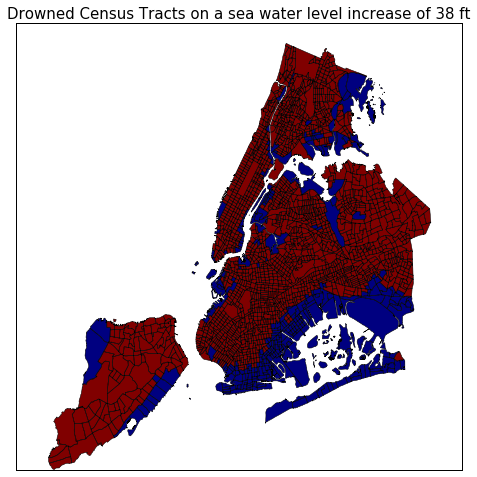

In [23]:
# "Head" and "Tail" should be non-negative, while "alpha" and "beta" here are range
# Feel free to change the upper bound of "alpha" and "beta" (default 10)

interact(drown, level = (0, 200))